In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Import sample data
data = pd.DataFrame(np.array([[2, 3, 0.],[4, 5, 0.],[11, 11, 1.],[4, 11, 1.],[12, 5, 0.],[5, 2, 0.],[6, 1, 0.],[6, 3, 0.],
                              [2, 10, 1.],[4, 7, 1.],[13, 8, 0.],[1, 6, 1.],[6, 9, 1.],[10, 12, 1.],[8, 3, 0.],[2, 8, 1.]]))
Y = data.iloc[0:, 2].values
X = data.iloc[0:, [0, 1]].values
data.head()

,0,1,2
0,2.0,3.0,0.0
1,4.0,5.0,0.0
2,11.0,11.0,1.0
3,4.0,11.0,1.0
4,12.0,5.0,0.0


In [2]:
# Iters is number of epochs/iterations and eta is the learning rate
def trainPerceptron(X, Y, iters, eta):
    weights = np.zeros(1 + X.shape[1])
    for i in range(iters):
        for x, y in zip(X, Y):
            summation = np.dot(x, weights[1:]) + weights[0]
            prediction = 1 if summation > 0 else 0
            weights[0] += eta * (y - prediction)
            weights[1:] += eta * (y - prediction) * x
    return weights

weights = trainPerceptron(X, Y, 100, 0.01)
print("Learned Weights:", weights)

Learned Weights: [-0.76 -0.36  0.43]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


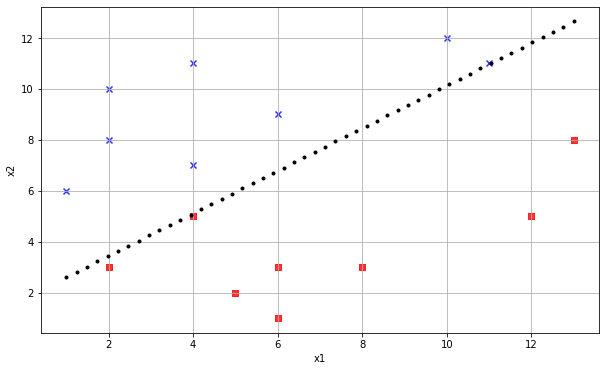

In [3]:
def plotData(X, Y, weights):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    markers = ('s', 'x',)
    colors = ('red', 'blue',)
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl) 

    for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]
        y = (slope*i) + intercept
        plt.plot(i, y, 'k.')

plotData(X,Y,weights)